In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [52]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
data = pd.read_csv('heart.csv')
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
columns = list(data.columns)
columns

['Age',
 'Sex',
 'ChestPainType',
 'RestingBP',
 'Cholesterol',
 'FastingBS',
 'RestingECG',
 'MaxHR',
 'ExerciseAngina',
 'Oldpeak',
 'ST_Slope',
 'HeartDisease']

In [8]:
data.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [6]:
data.select_dtypes(include='object').nunique() ## lists outs all the categorical columns with the no. of unique values

Sex               2
ChestPainType     4
RestingECG        3
ExerciseAngina    2
ST_Slope          3
dtype: int64

In [7]:
data.select_dtypes(include='number').nunique() ## lists outs all the numerical columns with the no. of unique values

Age              50
RestingBP        67
Cholesterol     222
FastingBS         2
MaxHR           119
Oldpeak          53
HeartDisease      2
dtype: int64

In [5]:
data.describe()  ## basics summaries of the numerical columns

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [15]:
data.isna().sum() ## There is no missing values

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [106]:
data.drop_duplicates(inplace=True)

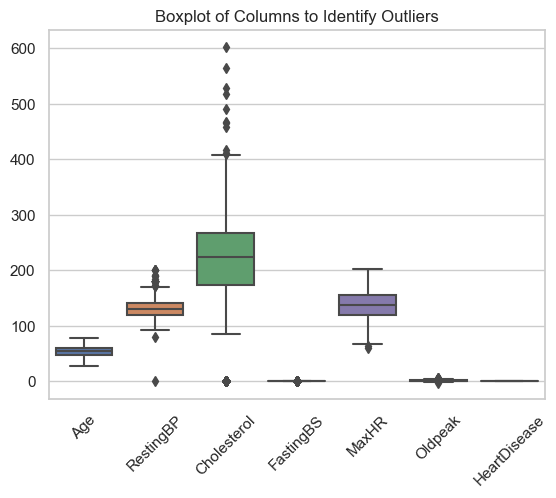

In [12]:
sns.boxplot(data=data)
plt.title("Boxplot of Columns to Identify Outliers")
plt.xticks(rotation=45)
plt.show()

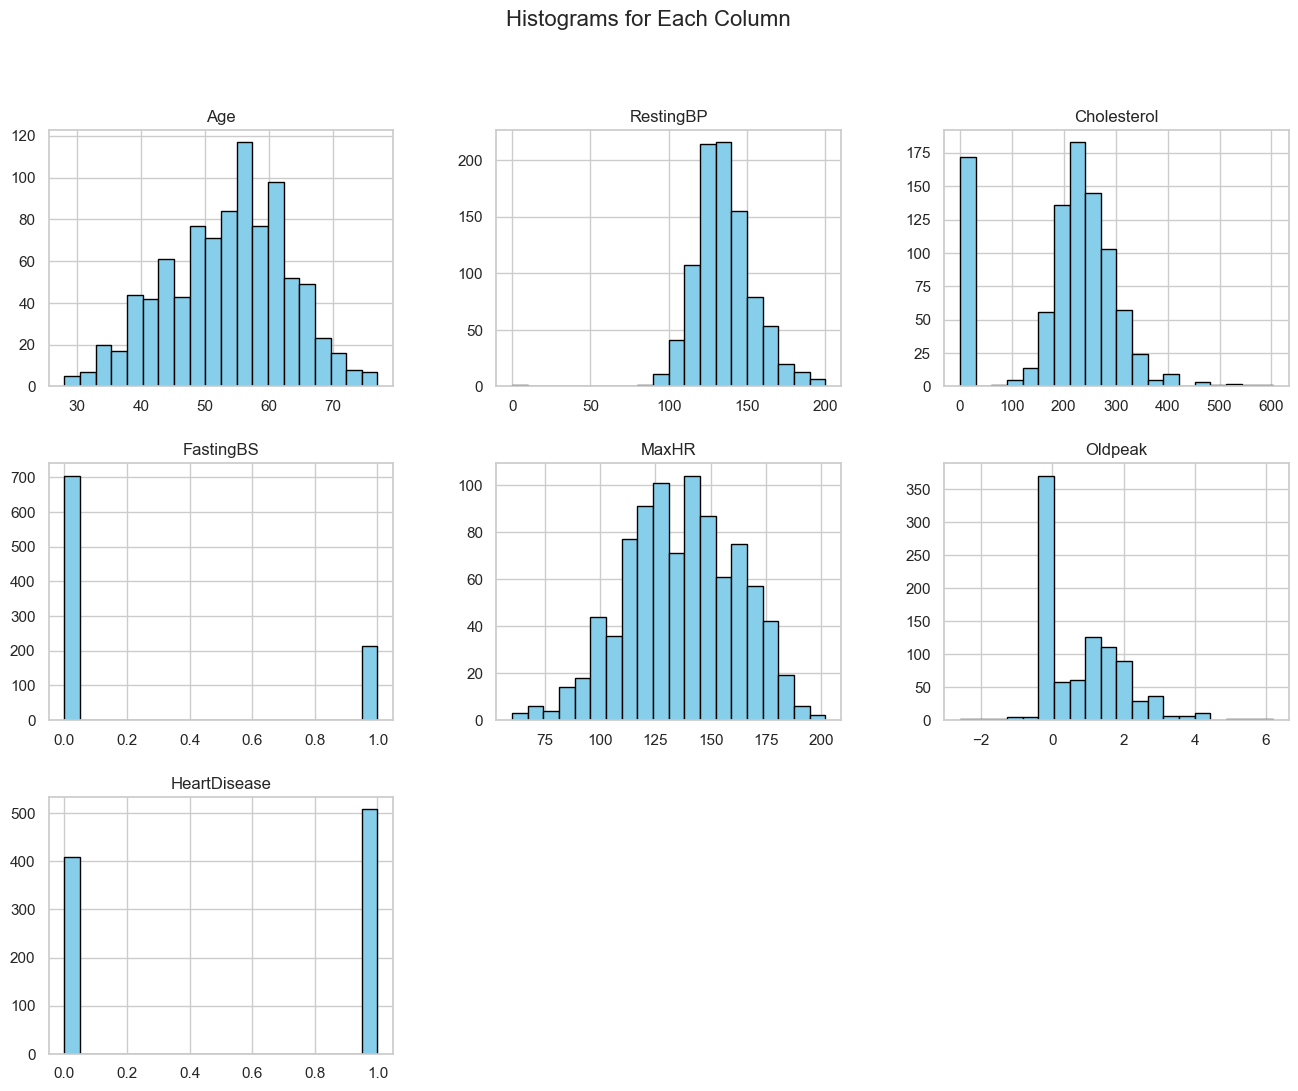

In [14]:
data.hist(bins=20, figsize=(16, 12), color='skyblue', edgecolor='black')
plt.suptitle("Histograms for Each Column", fontsize=16)
plt.show()

In [24]:
data['HeartDisease'].value_counts(normalize=True)

1    0.553377
0    0.446623
Name: HeartDisease, dtype: float64

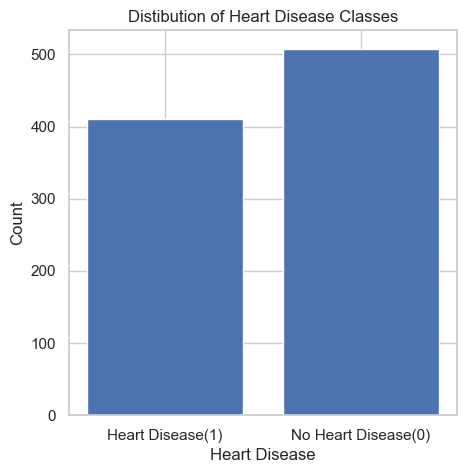

In [47]:
class_counts = data['HeartDisease'].value_counts()
plt.figure(figsize=(5,5))
plt.bar(class_counts.index, class_counts.values)
plt.xticks(class_counts.index, ['No Heart Disease(0)', 'Heart Disease(1)'])
plt.xlabel('Heart Disease')
plt.ylabel('Count')
plt.title('Distibution of Heart Disease Classes')
plt.show()

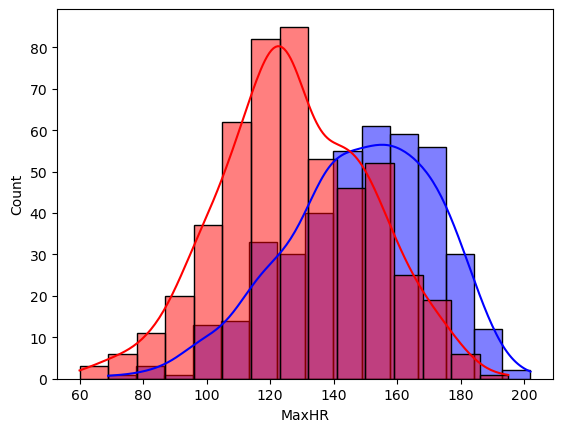

In [42]:
sns.histplot(data[data['HeartDisease'] == 0]['MaxHR'], bins=15, kde=True, label='No Heart Disease (0)', color="blue")
sns.histplot(data[data['HeartDisease'] == 1]['MaxHR'], bins=15, kde=True, label='Heart Disease (1)', color='red')
plt.show()

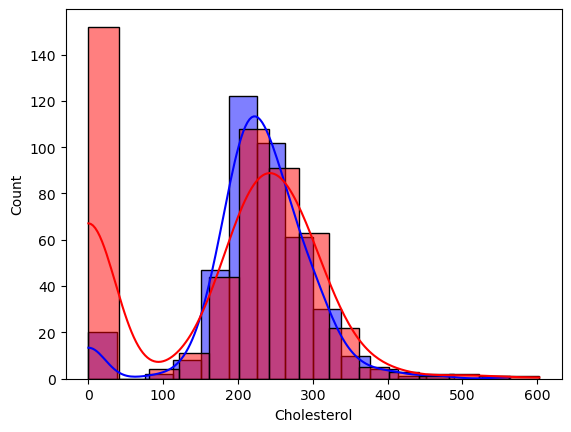

In [46]:
sns.histplot(data[data['HeartDisease'] == 0]['Cholesterol'], bins=15, kde=True, label='No Heart Disease (0)', color="blue")
sns.histplot(data[data['HeartDisease'] == 1]['Cholesterol'], bins=15, kde=True, label='Heart Disease (1)', color='red')
plt.show()

## UNIVARIATE ANALYSIS

### Numerical Columns

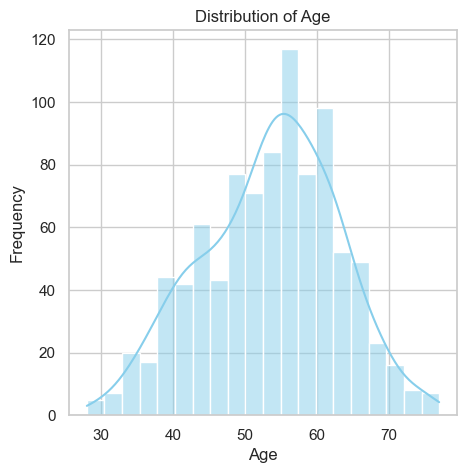

In [18]:
sns.histplot(data['Age'], kde=True, color="skyblue", bins=20)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

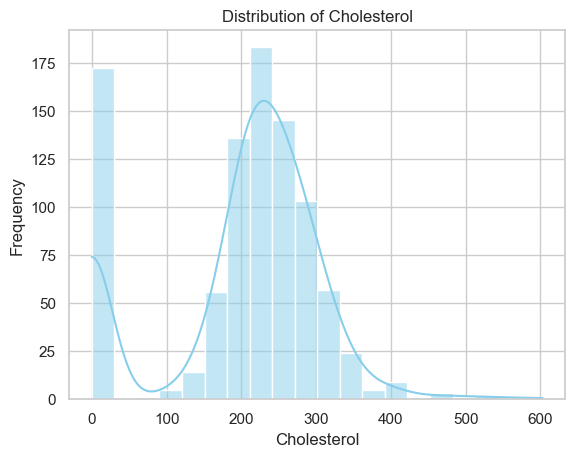

In [63]:
sns.histplot(data['Cholesterol'], kde=True, color="skyblue", bins=20)
plt.title('Distribution of Cholesterol')
plt.xlabel('Cholesterol')
plt.ylabel('Frequency')
plt.show()

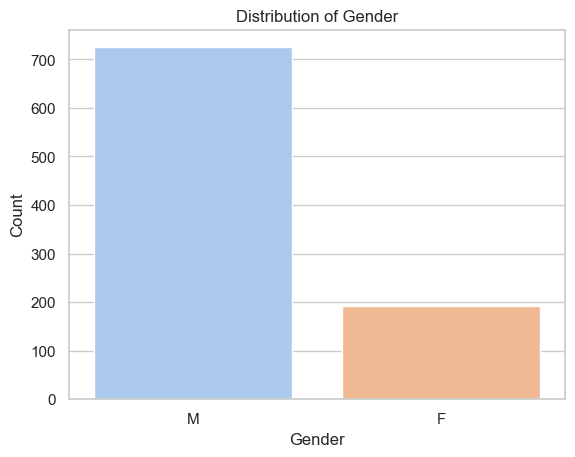

In [19]:
sns.countplot(x='Sex', data=data, palette="pastel")
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

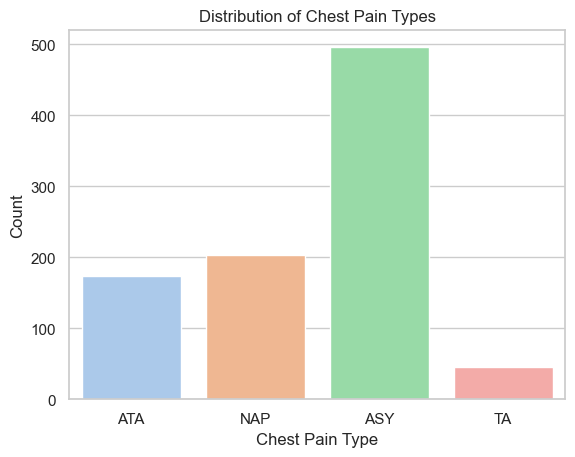

In [23]:
sns.countplot(x='ChestPainType', data=data, palette="pastel")
plt.title('Distribution of Chest Pain Types')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.show()

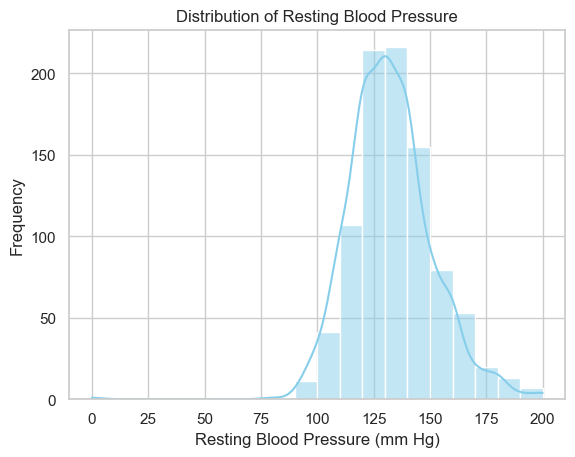

In [21]:
sns.histplot(data['RestingBP'], kde=True, color="skyblue", bins=20)
plt.title('Distribution of Resting Blood Pressure')
plt.xlabel('Resting Blood Pressure (mm Hg)')
plt.ylabel('Frequency')
plt.show()

### Categorical Columns

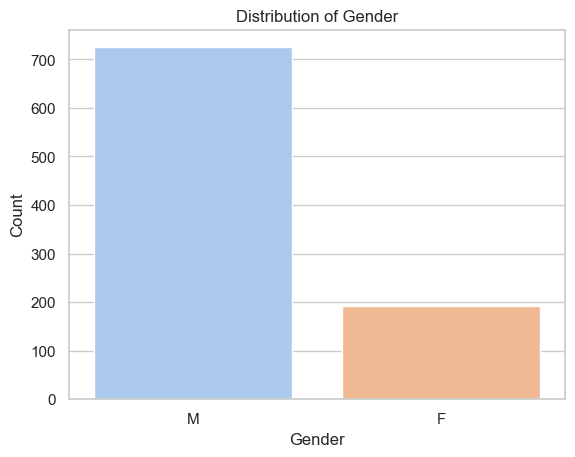

In [24]:
sns.countplot(x='Sex', data=data, palette="pastel")
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

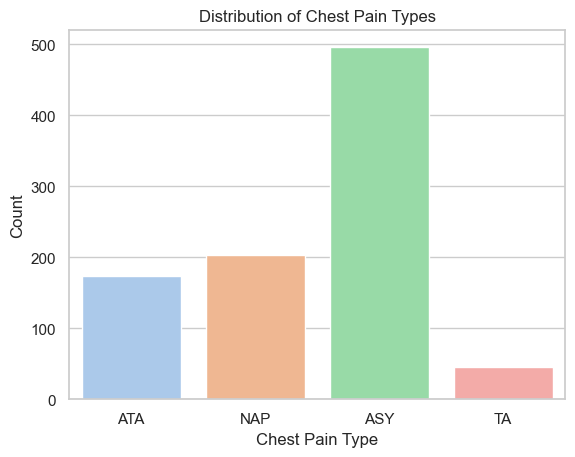

In [25]:
sns.countplot(x='ChestPainType', data=data, palette="pastel")
plt.title('Distribution of Chest Pain Types')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.show()

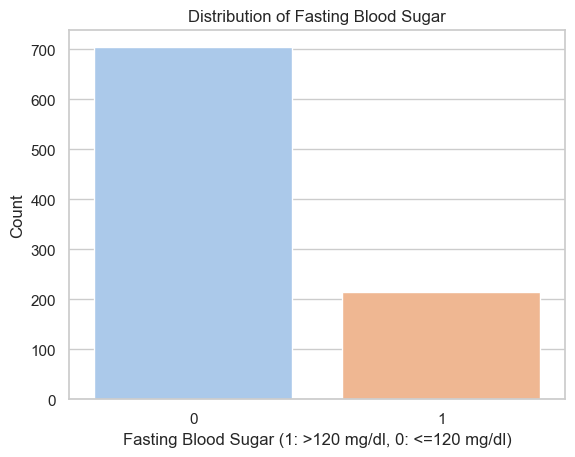

In [26]:
sns.countplot(x='FastingBS', data=data, palette="pastel")
plt.title('Distribution of Fasting Blood Sugar')
plt.xlabel('Fasting Blood Sugar (1: >120 mg/dl, 0: <=120 mg/dl)')
plt.ylabel('Count')
plt.show()

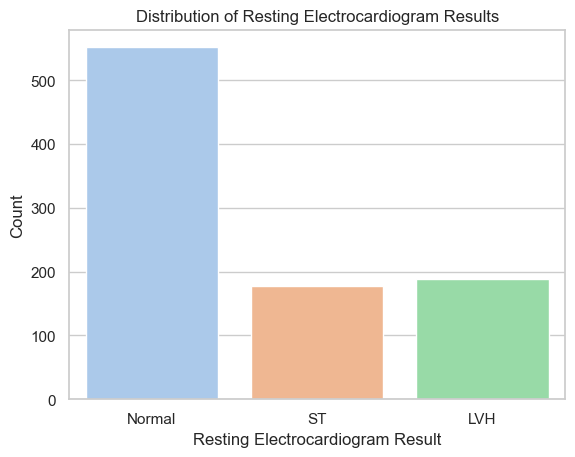

In [27]:
sns.countplot(x='RestingECG', data=data, palette="pastel")
plt.title('Distribution of Resting Electrocardiogram Results')
plt.xlabel('Resting Electrocardiogram Result')
plt.ylabel('Count')
plt.show()

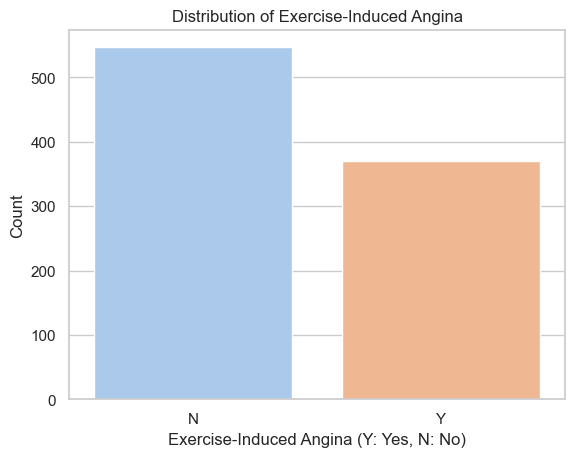

In [28]:
sns.countplot(x='ExerciseAngina', data=data, palette="pastel")
plt.title('Distribution of Exercise-Induced Angina')
plt.xlabel('Exercise-Induced Angina (Y: Yes, N: No)')
plt.ylabel('Count')
plt.show()

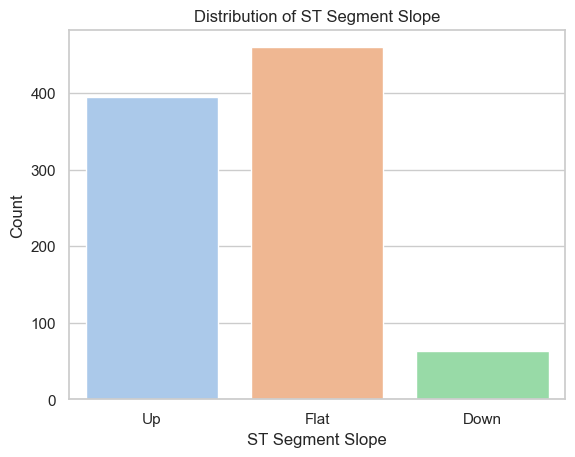

In [29]:
sns.countplot(x='ST_Slope', data=data, palette="pastel")
plt.title('Distribution of ST Segment Slope')
plt.xlabel('ST Segment Slope')
plt.ylabel('Count')
plt.show()

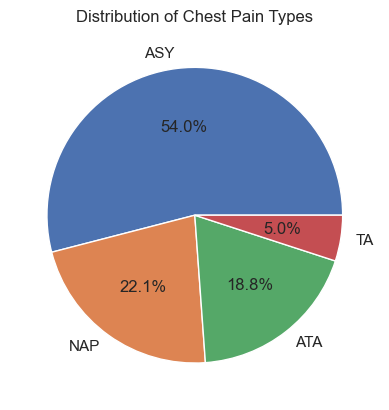

In [40]:
chest_pain_counts = data['ChestPainType'].value_counts()
plt.pie(chest_pain_counts, labels=chest_pain_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Chest Pain Types')
plt.show()

## Bivariate Analysis

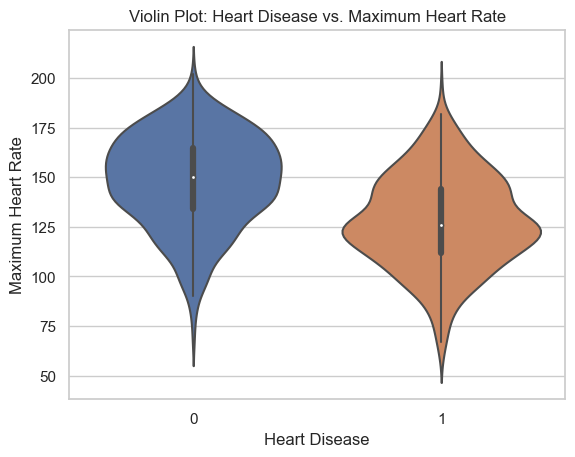

In [44]:
sns.violinplot(x='HeartDisease', y='MaxHR', data=data)
plt.title('Violin Plot: Heart Disease vs. Maximum Heart Rate')
plt.xlabel('Heart Disease')
plt.ylabel('Maximum Heart Rate')
plt.show()

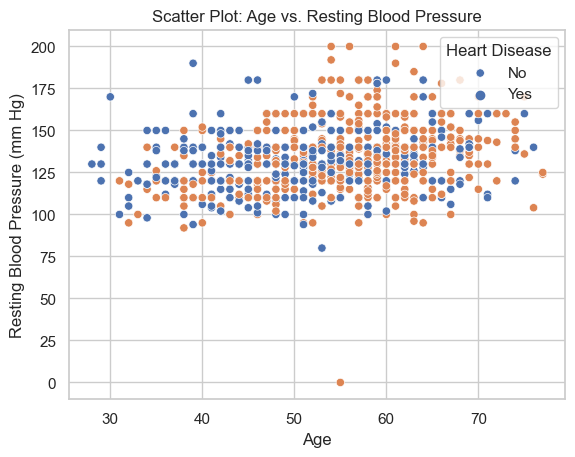

In [45]:
sns.scatterplot(x='Age', y='RestingBP', data=data, hue='HeartDisease')
plt.title('Scatter Plot: Age vs. Resting Blood Pressure')
plt.xlabel('Age')
plt.ylabel('Resting Blood Pressure (mm Hg)')
plt.legend(title='Heart Disease', loc='upper right', labels=['No', 'Yes'])
plt.show()

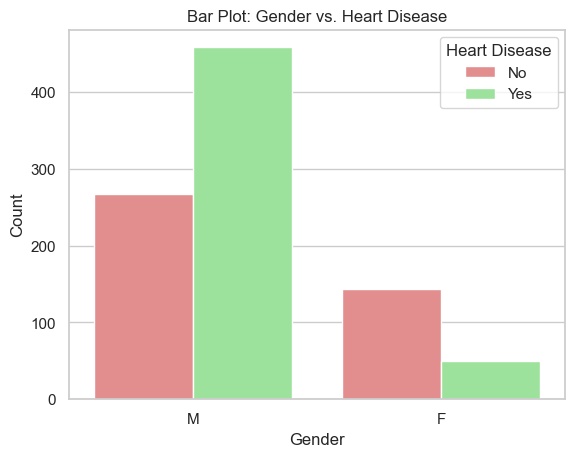

In [46]:
sns.countplot(x='Sex', hue='HeartDisease', data=data, palette={0: 'lightcoral', 1: 'lightgreen'})
plt.title('Bar Plot: Gender vs. Heart Disease')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Heart Disease', loc='upper right', labels=['No', 'Yes'])
plt.show()

<Axes: xlabel='ExerciseAngina', ylabel='count'>

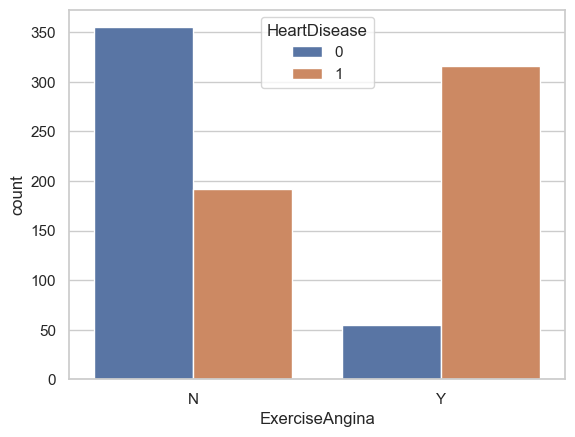

In [54]:
sns.countplot(data=data, x='ExerciseAngina', hue='HeartDisease')

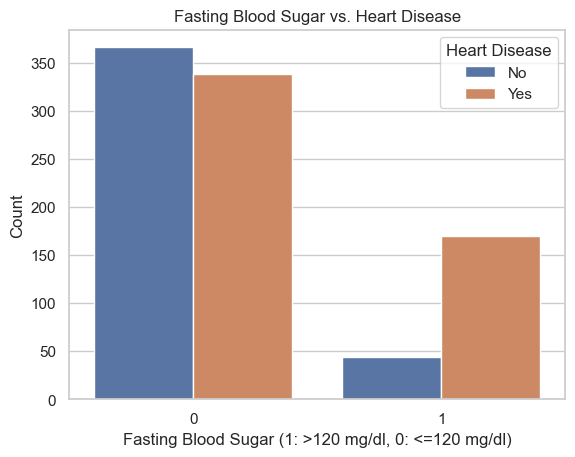

In [108]:
sns.countplot(x='FastingBS', hue='HeartDisease', data=data)
plt.title('Fasting Blood Sugar vs. Heart Disease')
plt.xlabel('Fasting Blood Sugar (1: >120 mg/dl, 0: <=120 mg/dl)')
plt.ylabel('Count')
plt.legend(title='Heart Disease', loc='upper right', labels=['No', 'Yes'])
plt.show()

<Axes: >

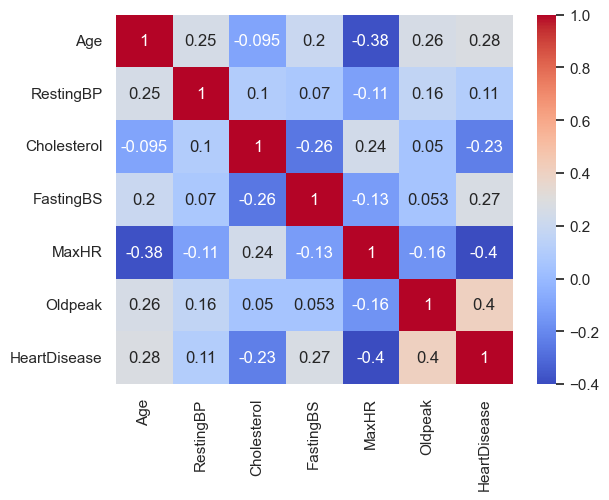

In [55]:
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')

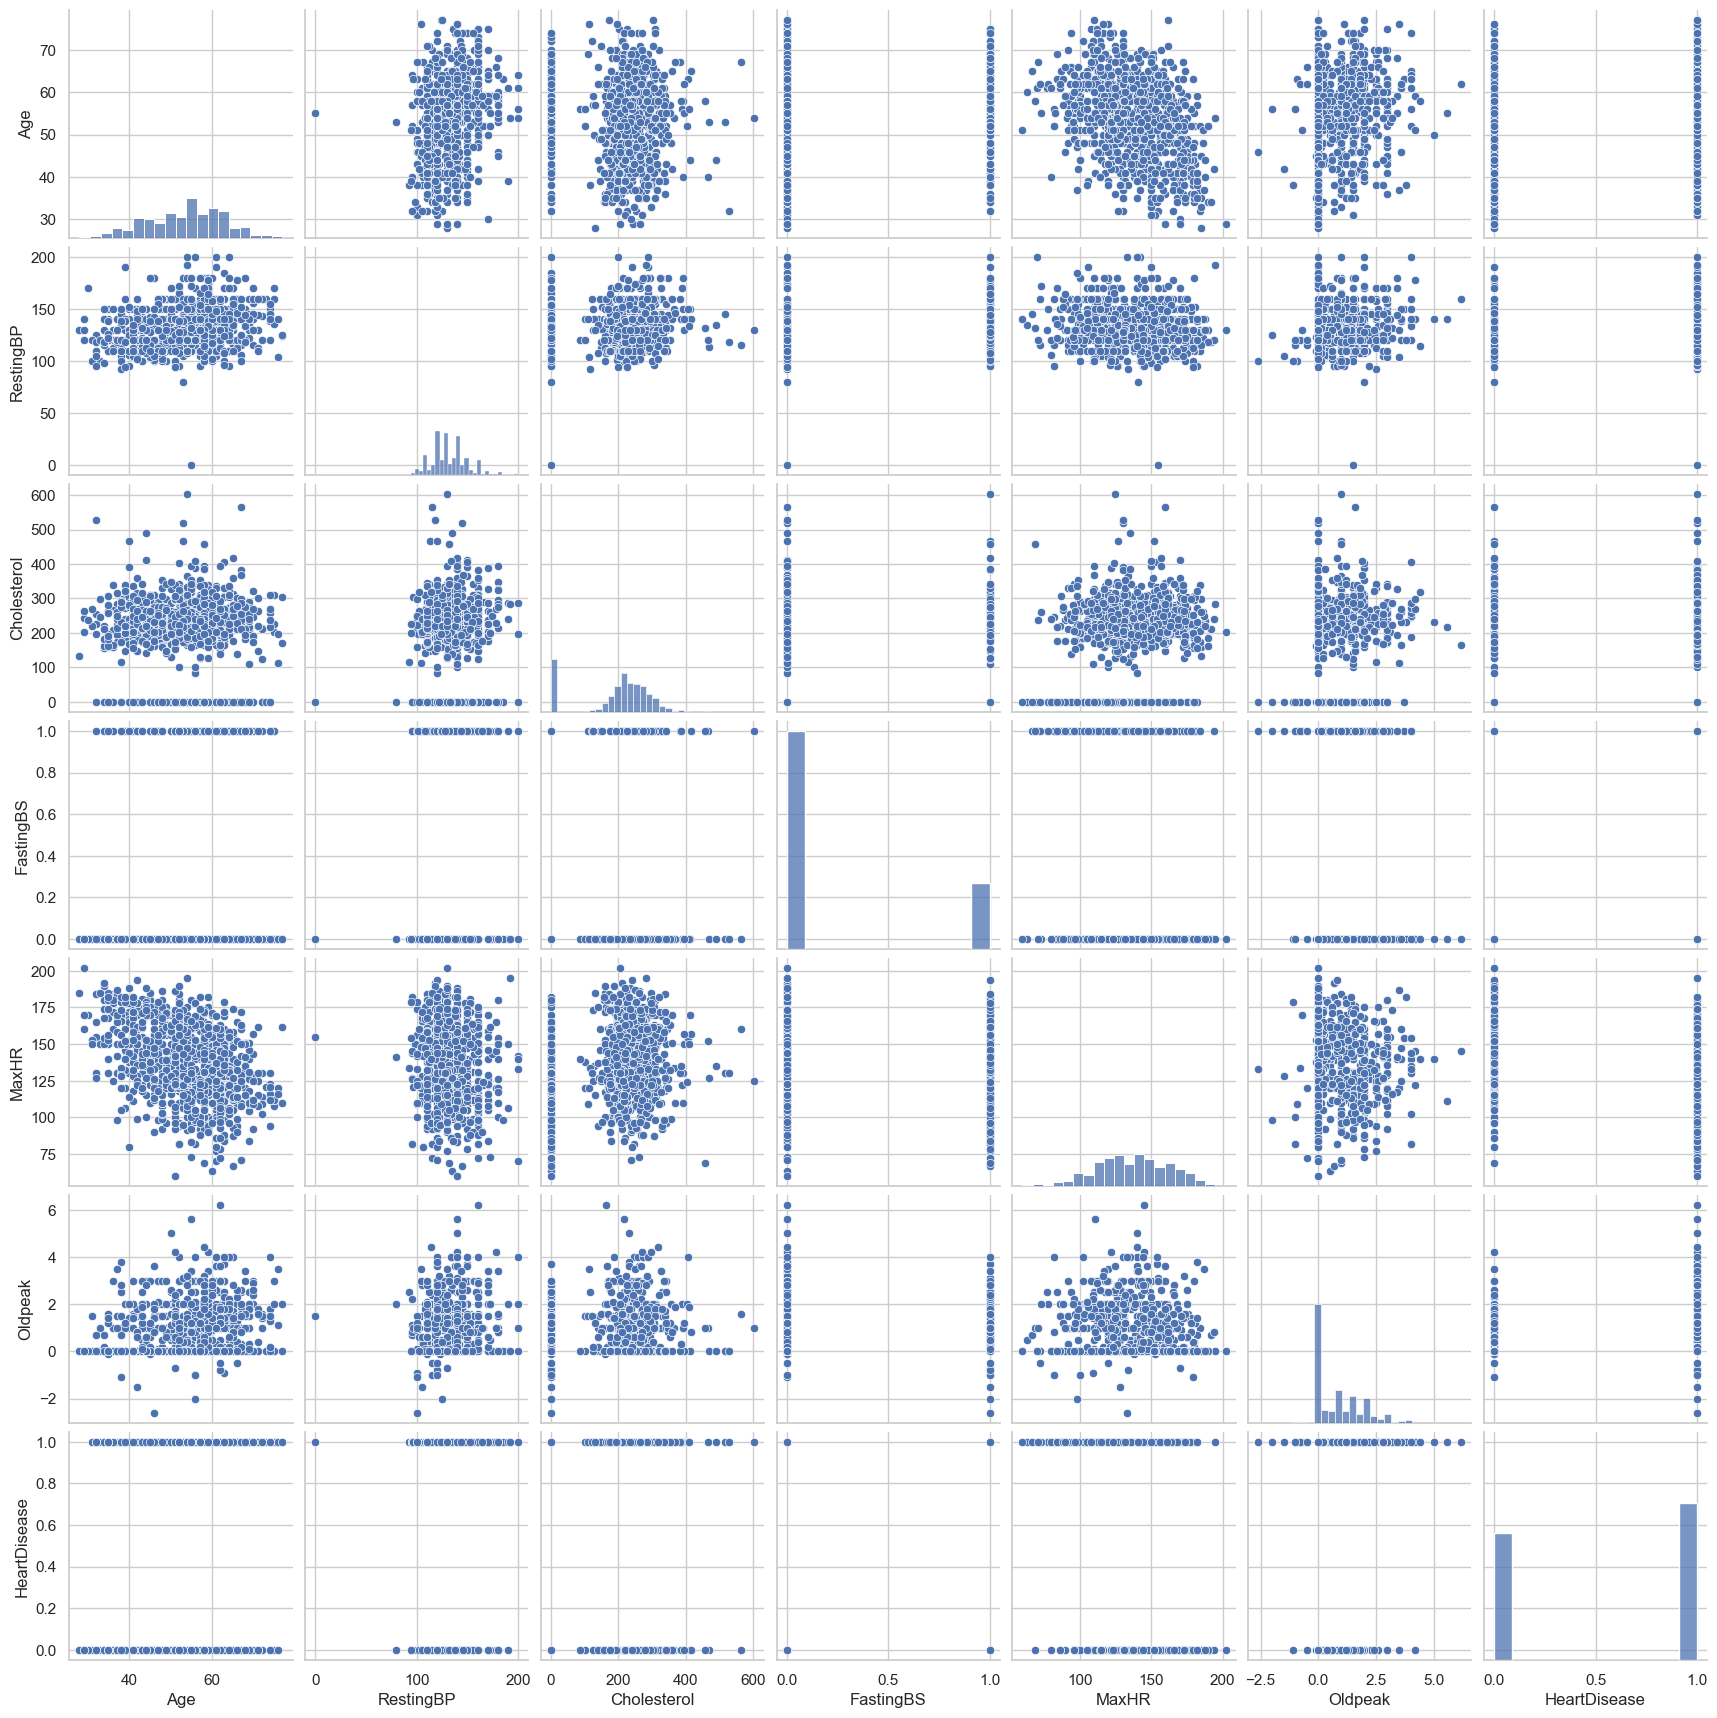

In [57]:
sns.pairplot(data)

## Distributions

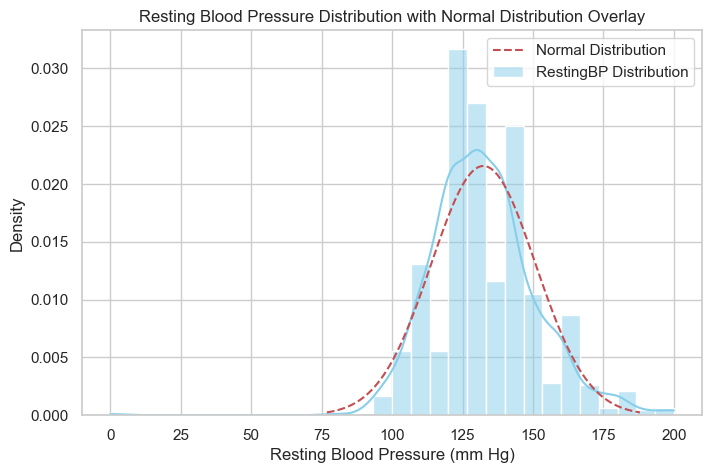

The data is right-skewed (positively skewed). Skewness value: 0.18


In [118]:
from scipy.stats import norm, skew
# Plot histogram with normal distribution
plt.figure(figsize=(8, 5))
sns.histplot(data['RestingBP'], kde=True, color='skyblue', stat='density', bins=30, label='RestingBP Distribution')

# a normal distribution curve
mu, sigma = data['RestingBP'].mean(), data['RestingBP'].std()
x = np.linspace(mu - 3 * sigma, mu + 3 * sigma, 100)
plt.plot(x, norm.pdf(x, mu, sigma), 'r--', label='Normal Distribution')

plt.title('Resting Blood Pressure Distribution with Normal Distribution Overlay')
plt.xlabel('Resting Blood Pressure (mm Hg)')
plt.ylabel('Density')
plt.legend()
plt.show()

# Check skewness
skewness = skew(data['RestingBP'])
if skewness > 0:
    print(f"The data is right-skewed (positively skewed). Skewness value: {skewness:.2f}")
elif skewness < 0:
    print(f"The data is left-skewed (negatively skewed). Skewness value: {skewness:.2f}")
else:
    print("The data is approximately symmetric.")

## Hypothesis test

In [119]:
from scipy.stats import ttest_1samp

# Specified value for the null hypothesis
null_value = 120 

# a one-sample t-test
t_statistic, p_value = ttest_1samp(data['RestingBP'], null_value)

print(f'T-Statistic: {t_statistic}')
print(f'P-Value: {p_value}')

# Check the significance at a common alpha level (e.g., 0.05)
alpha = 0.05
if p_value < alpha:
    print(f'Reject the null hypothesis. The mean is significantly different from {null_value}.')
else:
    print(f'Fail to reject the null hypothesis. The mean is not significantly different from {null_value}.')

T-Statistic: 20.28696345166982
P-Value: 7.07952242672859e-76
Reject the null hypothesis. The mean is significantly different from 120.
